<a href="https://colab.research.google.com/github/SARA3SAEED/LLM-2/blob/main/25_2_hf%5DWeek3_Day4_Ollama_example_rag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/sergiopaniego/RAG_local_tutorial/blob/main/example_rag.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Simple RAG example with Langchain, Ollama and and open-source LLM model

In this example, we first connect to an LLM locally and make request to the LLM that Ollama is serving using LangChain. After that, we generate our RAG application from a PDF file and extract details from that document.

<p align="center">
  <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2023/07/langchain3.png" alt="Langchain Logo" width="20%">
  <img src="https://bookface-images.s3.amazonaws.com/logos/ee60f430e8cb6ae769306860a9c03b2672e0eaf2.png" alt="Ollama Logo" width="20%">
</p>

Sources:

* https://github.com/svpino/llm
* https://github.com/AIAnytime/Gemma-7B-RAG-using-Ollama/blob/main/Ollama%20Gemma.ipynb
* https://www.youtube.com/watch?v=-MexTC18h20&ab_channel=AIAnytime
* https://www.youtube.com/watch?v=HRvyei7vFSM&ab_channel=Underfitted


# Requirements

* Ollama installed locally

# Install the requirements

If an error is raised related to docarray, refer to this solution: https://stackoverflow.com/questions/76880224/error-using-using-docarrayinmemorysearch-in-langchain-could-not-import-docarray

In [1]:
!pip3 install langchain
!pip3 install langchain_pinecone
!pip3 install langchain[docarray]
!pip3 install docarray
!pip3 install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.8/384.8 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.2/270.2 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 11.0 MB/s eta 0:00:00


# Select the LLM model to use

The model must be downloaded locally to be used, so if you want to run llama3, you should run:

```

ollama pull llama3

```

Check the list of models available for Ollama here: https://ollama.com/library

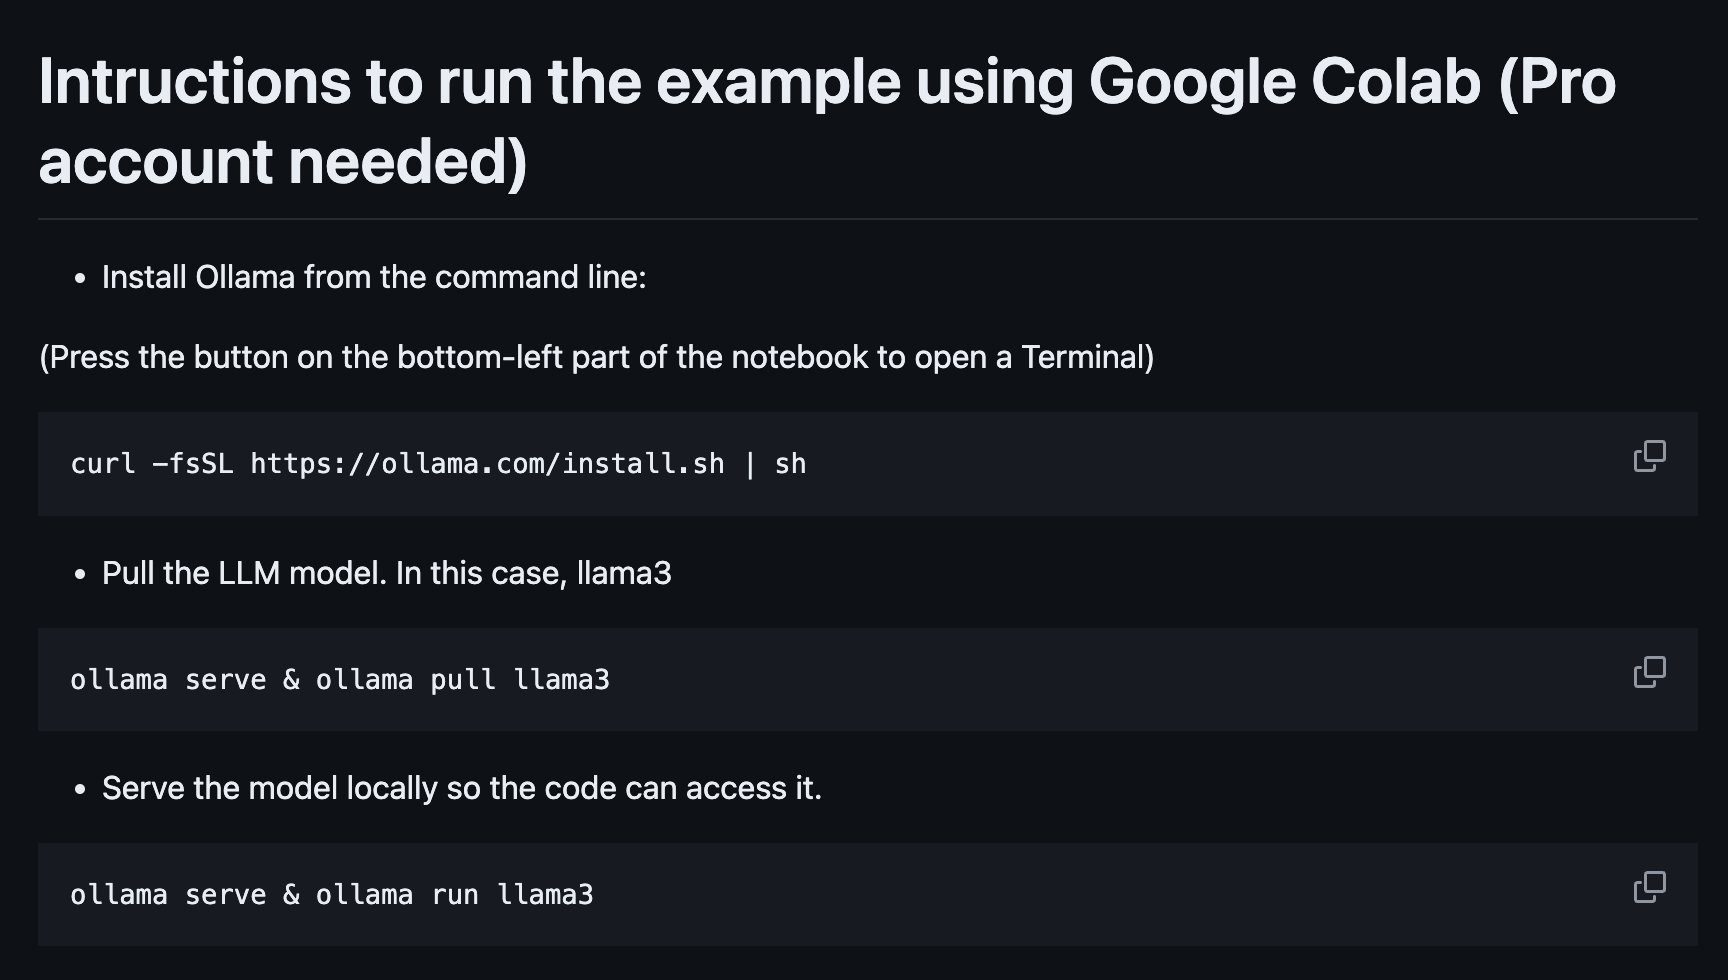

[ollama link](https://github.com/sergiopaniego/RAG_local_tutorial)



In [2]:
#MODEL = "gpt-3.5-turbo"
#MODEL = "mixtral:8x7b"
#MODEL = "gemma:7b"
#MODEL = "llama2"
MODEL = "llama3" # https://ollama.com/library/llama3

# We instanciate the LLM model and the Embedding model

In [3]:
!pip3 install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.9 MB/s eta 0:00:00


In [4]:
!pip install colab-xterm #https://pypi.org/project/colab-xterm/
%load_ext colabxterm

!pip install colab-xterm -qqq
!pip install langchain -qqq
!pip install langchain_community -qqq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 6.0 MB/s eta 0:00:00


Run the following in the terminal window:


```
curl -fsSL https://ollama.com/install.sh | sh
ollama serve & ollama pull llama3 & ollama pull nomic-embed-text
```



In [ ]:
# type these codes in below terminal after run the cell (%xterm)
# curl -fsSL https://ollama.com/install.sh | sh
# ollama serve & ollama pull llama3 & ollama pull nomic-embed-text

In [5]:
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [6]:
from langchain_community.llms import Ollama
from langchain_community.embeddings import OllamaEmbeddings

model = Ollama(model=MODEL)
embeddings = OllamaEmbeddings(model=MODEL)

model.invoke("Give me an inspirational quote")

'Here\'s one:\n\n"Believe you can and you\'re halfway there." - Theodore Roosevelt\n\nI hope it inspires you to take action and chase your dreams!'

In [7]:
model.invoke("Waht is 2+2?")

'The answer to 2+2 is... (drumroll please)... 4!'

In [ ]:
from langchain_community.llms import Ollama
from langchain_community.embeddings import OllamaEmbeddings

model = Ollama(model=MODEL)
embeddings = OllamaEmbeddings(model=MODEL)

model.invoke("Give me an inspirational qoute")

In [ ]:
model.invoke("Waht is 2+2?")

## Using a parser provided by LangChain, we can transform the LLM output to something more suitable to be read

In [8]:
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()
response_from_model = model.invoke("Give me an inspirational quote")
parsed_response = parser.parse(response_from_model)
print(parsed_response)

Here's one:

"Believe you can and you're halfway there." - Theodore Roosevelt


In [9]:
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()
response_from_model = model.invoke("Waht is 2+2?")
parsed_response = parser.parse(response_from_model)
print(parsed_response)

The answer to 2+2 is 4.


# We generate the template for the conversation with the instruct-based LLM

We can create a template to structure the conversation effectively.

This template allows us to provide some general context to the Language Learning Model (LLM), which will be utilized for every prompt. This ensures that the model has a consistent background understanding for all interactions.

Additionally, we can include specific context relevant to the particular prompt. This helps the model understand the immediate scenario or topic before addressing the actual question. Following this specific context, we then present the actual question we want the model to answer.

By using this approach, we enhance the model's ability to generate accurate and relevant responses based on both the general and specific contexts provided.

In [10]:
from langchain.prompts import PromptTemplate

template = """
Answer the question based on the context below. If you can't
answer the question, answer with "I don't know".

Context: {context}

Question: {question}
"""

prompt = PromptTemplate.from_template(template)
prompt.format(context="Here is some context", question="Here is a question")

'\nAnswer the question based on the context below. If you can\'t\nanswer the question, answer with "I don\'t know".\n\nContext: Here is some context\n\nQuestion: Here is a question\n'

In [11]:
from langchain.prompts import PromptTemplate

template = """
Answer the question based on the context below. If you can't
answer the question, answer with "I don't know".

Context: {context}

Question: {question}
"""

prompt = PromptTemplate.from_template(template)
prompt.format(context="Here is some context", question="Here is a question")

'\nAnswer the question based on the context below. If you can\'t\nanswer the question, answer with "I don\'t know".\n\nContext: Here is some context\n\nQuestion: Here is a question\n'

The model can answer prompts based on the context:

In [12]:
formatted_prompt = prompt.format(context="My parents named me Sergio", question="What's your name?")
response_from_model = model.invoke(formatted_prompt)
parsed_response = parser.parse(response_from_model)
print(parsed_response)

Sergio.


But it can't answer what is not provided as context:

In [13]:
formatted_prompt = prompt.format(context="My parents named me Sergio", question="What's my age?")
response_from_model = model.invoke(formatted_prompt)
parsed_response = parser.parse(response_from_model)
print(parsed_response)

I don't know.


Even previously known info!

In [14]:
formatted_prompt = prompt.format(context="My parents named me Sergio", question="What is 2+2?")
response_from_model = model.invoke(formatted_prompt)
parsed_response = parser.parse(response_from_model)
print(parsed_response)

I don't know!


In [15]:
from decimal import Context
formatted_prompt = prompt.format(context="My parents named me Sergio", question="What 2+2?")
response_from_model = model.invoke(formatted_prompt)
parsed_response = parser.parse(response_from_model)
print(parsed_response)

I don't know.


# Load an example PDF to do Retrieval Augmented Generation (RAG)

For the example, you can select your own PDF.

In [16]:
!wget https://github.com/sergiopaniego/RAG_local_tutorial/blob/main/files/example.pdf

--2024-08-14 15:18:28--  https://github.com/sergiopaniego/RAG_local_tutorial/blob/main/files/example.pdf
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘example.pdf’

example.pdf             [ <=>                ] 165.46K  --.-KB/s    in 0.03s   

2024-08-14 15:18:28 (5.39 MB/s) - ‘example.pdf’ saved [169430]



In [17]:
!pip install pypdf

In [18]:
from langchain_community.document_loaders import PyPDFLoader


loader = PyPDFLoader("https://arxiv.org/pdf/2103.15348")
pages = loader.load_and_split()
#pages = loader.load()
pages

[Document(metadata={'source': 'https://arxiv.org/pdf/2103.15348', 'page': 0}, page_content='LayoutParser : A Uniﬁed Toolkit for Deep\nLearning Based Document Image Analysis\nZejiang Shen1( \x00), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain\nLee4, Jacob Carlson3, and Weining Li5\n1Allen Institute for AI\nshannons@allenai.org\n2Brown University\nruochen zhang@brown.edu\n3Harvard University\n{melissadell,jacob carlson }@fas.harvard.edu\n4University of Washington\nbcgl@cs.washington.edu\n5University of Waterloo\nw422li@uwaterloo.ca\nAbstract. Recent advances in document image analysis (DIA) have been\nprimarily driven by the application of neural networks. Ideally, research\noutcomes could be easily deployed in production and extended for further\ninvestigation. However, various factors like loosely organized codebases\nand sophisticated model conﬁgurations complicate the easy reuse of im-\nportant innovations by a wide audience. Though there have been on-going\neﬀorts to impro

In [19]:
from langchain_community.document_loaders import PyPDFLoader


loader = PyPDFLoader("https://arxiv.org/pdf/2103.15348")
pages = loader.load()
pages

[Document(metadata={'source': 'https://arxiv.org/pdf/2103.15348', 'page': 0}, page_content='LayoutParser : A Uniﬁed Toolkit for Deep\nLearning Based Document Image Analysis\nZejiang Shen1( \x00), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain\nLee4, Jacob Carlson3, and Weining Li5\n1Allen Institute for AI\nshannons@allenai.org\n2Brown University\nruochen zhang@brown.edu\n3Harvard University\n{melissadell,jacob carlson }@fas.harvard.edu\n4University of Washington\nbcgl@cs.washington.edu\n5University of Waterloo\nw422li@uwaterloo.ca\nAbstract. Recent advances in document image analysis (DIA) have been\nprimarily driven by the application of neural networks. Ideally, research\noutcomes could be easily deployed in production and extended for further\ninvestigation. However, various factors like loosely organized codebases\nand sophisticated model conﬁgurations complicate the easy reuse of im-\nportant innovations by a wide audience. Though there have been on-going\neﬀorts to impro

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=20)
text_documents = text_splitter.split_documents(pages)[:5]

pages

[Document(metadata={'source': 'https://arxiv.org/pdf/2103.15348', 'page': 0}, page_content='LayoutParser : A Uniﬁed Toolkit for Deep\nLearning Based Document Image Analysis\nZejiang Shen1( \x00), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain\nLee4, Jacob Carlson3, and Weining Li5\n1Allen Institute for AI\nshannons@allenai.org\n2Brown University\nruochen zhang@brown.edu\n3Harvard University\n{melissadell,jacob carlson }@fas.harvard.edu\n4University of Washington\nbcgl@cs.washington.edu\n5University of Waterloo\nw422li@uwaterloo.ca\nAbstract. Recent advances in document image analysis (DIA) have been\nprimarily driven by the application of neural networks. Ideally, research\noutcomes could be easily deployed in production and extended for further\ninvestigation. However, various factors like loosely organized codebases\nand sophisticated model conﬁgurations complicate the easy reuse of im-\nportant innovations by a wide audience. Though there have been on-going\neﬀorts to impro

In [20]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=20)
text_documents = text_splitter.split_documents(pages)[:5]

pages

[Document(metadata={'source': 'https://arxiv.org/pdf/2103.15348', 'page': 0}, page_content='LayoutParser : A Uniﬁed Toolkit for Deep\nLearning Based Document Image Analysis\nZejiang Shen1( \x00), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain\nLee4, Jacob Carlson3, and Weining Li5\n1Allen Institute for AI\nshannons@allenai.org\n2Brown University\nruochen zhang@brown.edu\n3Harvard University\n{melissadell,jacob carlson }@fas.harvard.edu\n4University of Washington\nbcgl@cs.washington.edu\n5University of Waterloo\nw422li@uwaterloo.ca\nAbstract. Recent advances in document image analysis (DIA) have been\nprimarily driven by the application of neural networks. Ideally, research\noutcomes could be easily deployed in production and extended for further\ninvestigation. However, various factors like loosely organized codebases\nand sophisticated model conﬁgurations complicate the easy reuse of im-\nportant innovations by a wide audience. Though there have been on-going\neﬀorts to impro

# Store the PDF in a vector space.

From Langchain docs:

`DocArrayInMemorySearch is a document index provided by Docarray that stores documents in memory. It is a great starting point for small datasets, where you may not want to launch a database server.`

The execution time of the following block depends on the complexity and longitude of the PDF provided. Try to keep it small and simple for the example.

In [ ]:
from langchain_community.vectorstores import DocArrayInMemorySearch

vectorstore = DocArrayInMemorySearch.from_documents(text_documents, embedding=embeddings)

/usr/local/lib/python3.10/dist-packages/pydantic/_migration.py:283: UserWarning: `pydantic.error_wrappers:ValidationError` has been moved to `pydantic:ValidationError`.
  warnings.warn(f'`{import_path}` has been moved to `{new_location}`.')


In [21]:
from langchain_community.vectorstores import DocArrayInMemorySearch

vectorstore = DocArrayInMemorySearch.from_documents(text_documents, embedding=embeddings)


/usr/local/lib/python3.10/dist-packages/pydantic/_migration.py:283: UserWarning: `pydantic.error_wrappers:ValidationError` has been moved to `pydantic:ValidationError`.
  warnings.warn(f'`{import_path}` has been moved to `{new_location}`.')


# Create retriever of vectors that are similar to be used as context

In [22]:
retriever = vectorstore.as_retriever()
retriever.invoke("artificial intelligence")

[Document(metadata={'source': 'https://arxiv.org/pdf/2103.15348', 'page': 0}, page_content='Lee4, Jacob Carlson3, and Weining Li5\n1Allen Institute for AI\nshannons@allenai.org'),
 Document(metadata={'source': 'https://arxiv.org/pdf/2103.15348', 'page': 0}, page_content='2Brown University\nruochen zhang@brown.edu\n3Harvard University'),
 Document(metadata={'source': 'https://arxiv.org/pdf/2103.15348', 'page': 0}, page_content='LayoutParser : A Uniﬁed Toolkit for Deep\nLearning Based Document Image Analysis'),
 Document(metadata={'source': 'https://arxiv.org/pdf/2103.15348', 'page': 0}, page_content='3Harvard University\n{melissadell,jacob carlson }@fas.harvard.edu\n4University of Washington')]

# Generate conversate with the document to extract the details

In [23]:
# Assuming retriever is an instance of a retriever class and has a method to retrieve context
retrieved_context = retriever.invoke("artificial intelligence")

In [ ]:
questions = [
    "With who is Jacob affiliated with?",
    "Where can Jacob be contacted at?",
    "What is Jacob?"
]

for question in questions:
    formatted_prompt = prompt.format(context=retrieved_context, question=question)
    response_from_model = model.invoke(formatted_prompt)
    parsed_response = parser.parse(response_from_model)

    print(f"Question: {question}")
    print(f"Answer: {parsed_response}")
    print()

Question: With who is Jacob affiliated with?
Answer: Based on the context, Jacob Carlson is affiliated with:

* Harvard University
* University of Washington (as {melissadell,jacob carlson}@fas.harvard.edu)

So, the answer would be "Harvard University" and "University of Washington".

Question: Where can Jacob be contacted at?
Answer: According to the context, Jacob Carlson can be contacted at:

3Harvard University
{jacob carlson}@fas.harvard.edu

Question: What is Jacob?
Answer: Jacob Carlson, a co-author on the paper.



In [24]:
questions = [
    "With who is Jacob affiliated with?",
    "Where can Jacob be contacted at?",
    "What is Jacob?"
]

for question in questions:
    formatted_prompt = prompt.format(context=retrieved_context, question=question)
    response_from_model = model.invoke(formatted_prompt)
    parsed_response = parser.parse(response_from_model)

    print(f"Question: {question}")
    print(f"Answer: {parsed_response}")
    print()

Question: With who is Jacob affiliated with?
Answer: Jacob Carlson is affiliated with Harvard University and also has an email address {melissadell,jacob carlson}@fas.harvard.edu.

Question: Where can Jacob be contacted at?
Answer: According to the context, Jacob Carlson can be contacted at Harvard University ({melissadell,jacob carlson}@fas.harvard.edu).

Question: What is Jacob?
Answer: Jacob Carlson is a person, specifically an author or researcher.



# Loop to ask-answer questions continously

In [ ]:
while True:
    print("Say 'exit' or 'quit' to exit the loop")
    question = input('User question: ')
    print(f"Question: {question}")
    if question.lower() in ["exit", "quit"]:
        print("Exiting the conversation. Goodbye!")
        break
    formatted_prompt = prompt.format(context=retrieved_context, question=question)
    response_from_model = model.invoke(formatted_prompt)
    parsed_response = parser.parse(response_from_model)
    print(f"Answer: {parsed_response}")
    print()

Say 'exit' or 'quit' to exit the loop
User question: Can you give the contacts for all authors 
Question: Can you give the contacts for all authors 
Answer: Based on the provided context, I can answer:

* Lee: shannons@allenai.org
* Carlson: {melissadell,jacob carlson}@fas.harvard.edu (note that this is a list of multiple authors)
* Li: Weining Li5 (no email address provided)

Let me know if you'd like me to help with anything else!

Say 'exit' or 'quit' to exit the loop
User question: exit
Question: exit
Exiting the conversation. Goodbye!


In [ ]:
while True:
    print("Say 'exit' or 'quit' to exit the loop")
    question = input('User question: ')
    print(f"Question: {question}")
    if question.lower() in ["exit", "quit"]:
        print("Exiting the conversation. Goodbye!")
        break
    formatted_prompt = prompt.format(context=retrieved_context, question=question)
    response_from_model = model.invoke(formatted_prompt)
    parsed_response = parser.parse(response_from_model)
    print(f"Answer: {parsed_response}")
    print()

Say 'exit' or 'quit' to exit the loop
User question: deep learing
Question: deep learing
Answer: I don't know

Say 'exit' or 'quit' to exit the loop
